<br>

# Project 2020 - Fundamentals of Data Analysis
***

## Eibhinn Lee

### G00226502
***

### Aim of the project
***

The aim of the project is to perform and explain 'Simple Linear Regression' using Python on the following dataset (powerproduction dataset) - https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv.

___

###### Overall Goal of the Project
****

The goal is to accurately predict wind turbine power output from wind speed values using the data as a basis.

___

##### Project Format

    - import libraries
    - import dataset
    - view dataset
    - plot dataset (to view the location of the points on the plot)
    - best fit line to linear regression
    - Analysis
    - Alternative Regression
    - Analysis
    - References


### Import python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] = (30, 20)

In [2]:
# import the dataset using pandas

df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
# stat data of dataset
# showing a break down of each variable (mean, standard deviation, min & max values within the dataset for each variable)

df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


### Dataset Plot

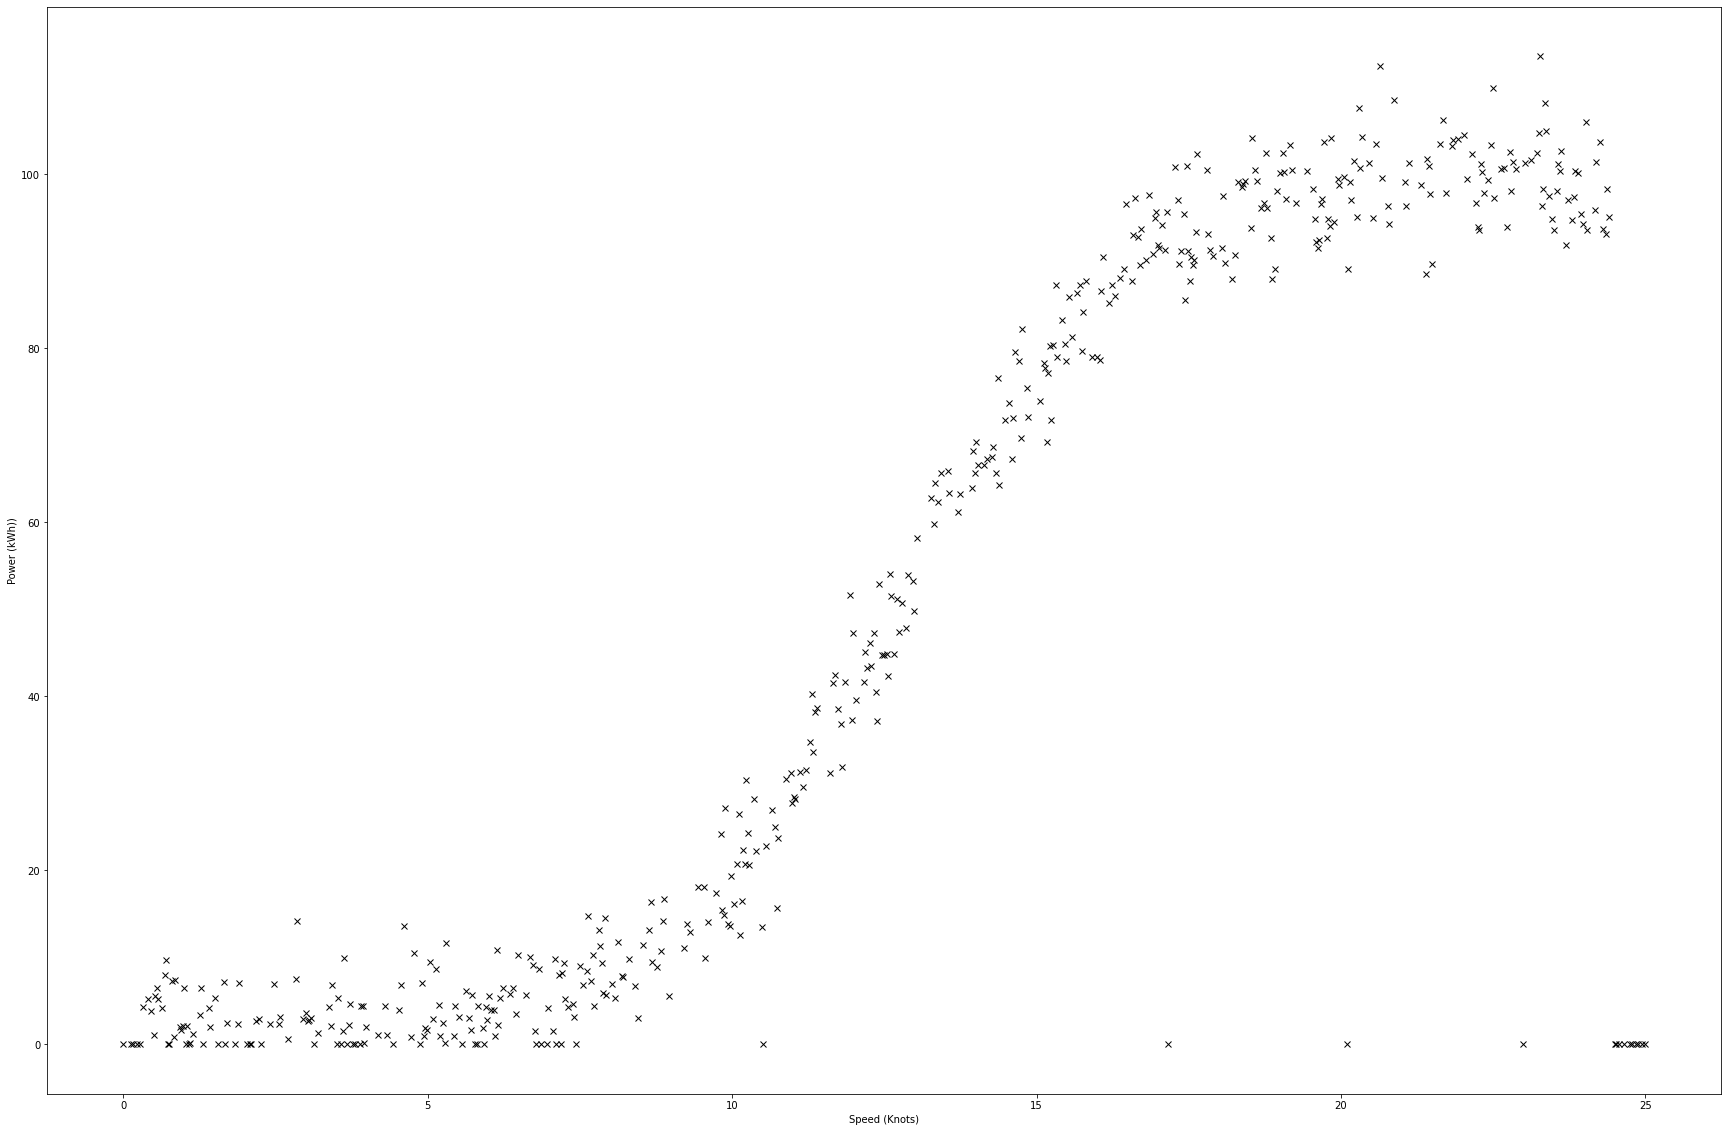

In [4]:
# Initial look at the dataset in the form of a plot
# You can see the shape of the graph is more 'S' shaped than straight
# And that at a max speed of 25 knots the power remains at zero.


# Calling each variable x & y
x = df['speed']
y = df['power']

# Plotting x & y, with each point marked with an x.
plt.plot(x, y, 'kx')

# labelling the x-axis & y- axis
plt.xlabel('Speed (Knots)')
plt.ylabel('Power (kWh))')

plt.show()

### Initial View of the Dataset

On first inspection of the dataset, you can see the values go diagonally from left to right, heading to the upper right corner of the plot. 

There is a cluster of the beginning of the dataset between 0 and 7 knots.

There is another cluster towards the upper right corner of the dataset between 18 and 24 knots

There appears to be somewhat strange values at 25 knots where 0 output seems to have been generated. 
***

### Additional visual representation
***
The next two plots are more for graphical representation of each variable and not so much important in the overall aim of the project.

What both graph's show is a histogram showing where most of the values are within the variable Speed and Power.


Speed

- As you can see the plot shows keep that most of the values are evenly spread amongst the dataset. This would be expected as by quickly looking at the dataset as a whole you can see the speed values rise from 0 to 25.

Power
- This graph shows much more variety when visually looking at it the plot. You can see most of the total values are somewhere between 0 and 23. Then as the line shows, the values fall away and again pick up between 75 and 112.
***

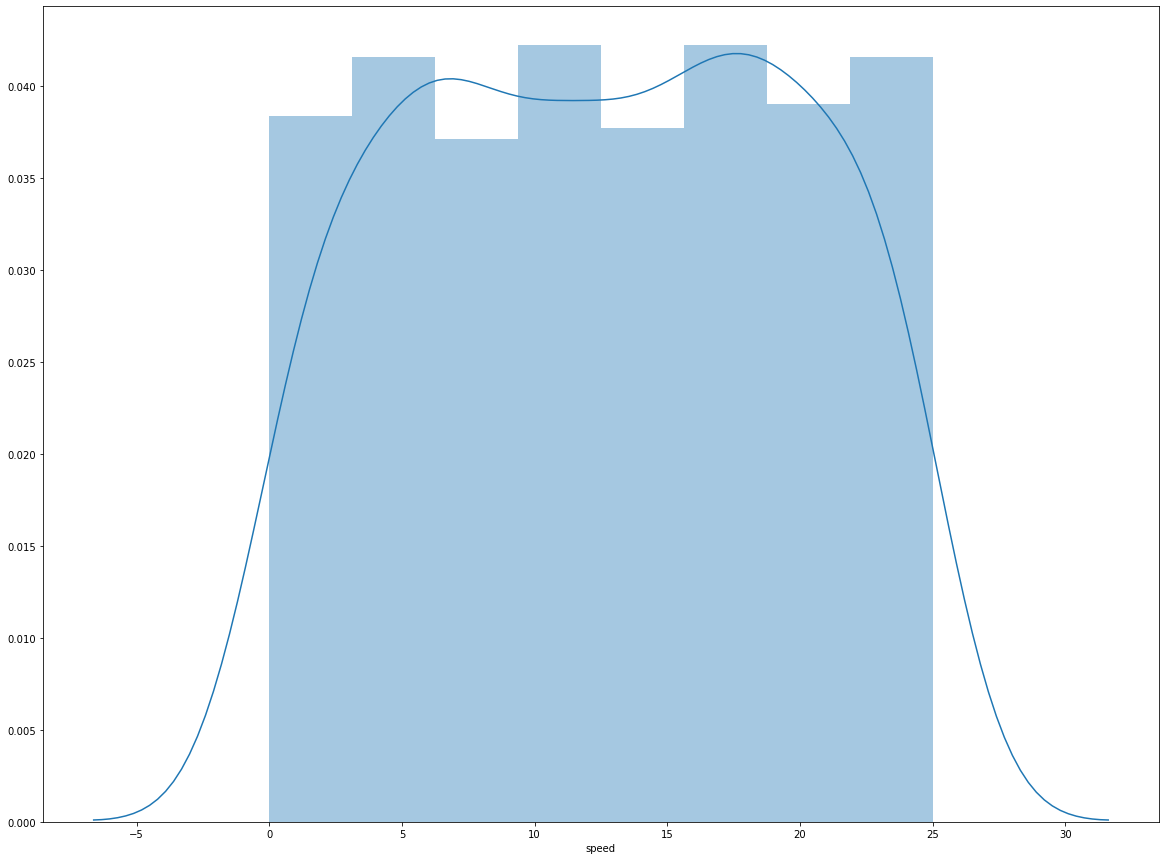

In [5]:
plt.figure(figsize=(20,15))
plt.tight_layout()
sns.distplot(df['speed'])

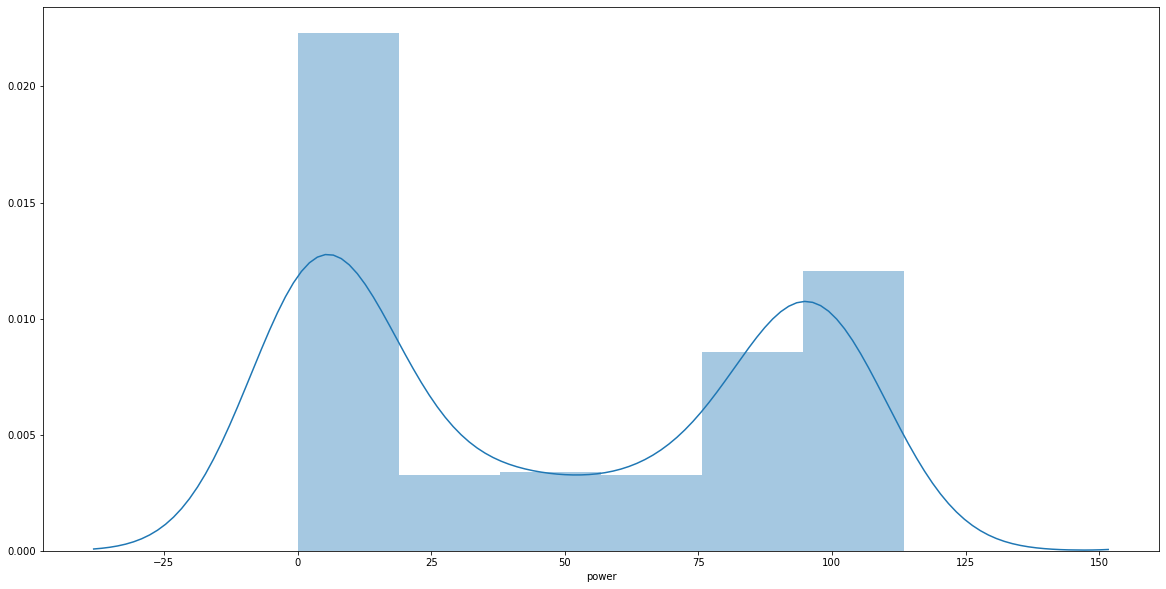

In [6]:
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.distplot(df['power'])

### Relationship 

In [7]:
# The below code looks at the relationsip or the coefficient of correlation known as 'r' between the x and y axis
# The output will allow me to identify if linear regression can be used for the dataset
# The r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.
# https://www.w3schools.com/python/python_ml_linear_regression.asp

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)


# The result below shows that there is a linear relationship between the x and y axis

0.8537775037188597


In [8]:
# This piece of code below uses the polyfit package from the numpy library.
# It allows us to fit a straight line to the dataset.
# This function takes out all the math calculations.
# The output returns the coefficients of the dataset.

coeffs = np.polyfit(x, y, 1)
coeffs

array([  4.91759567, -13.89990263])

### Best fit line

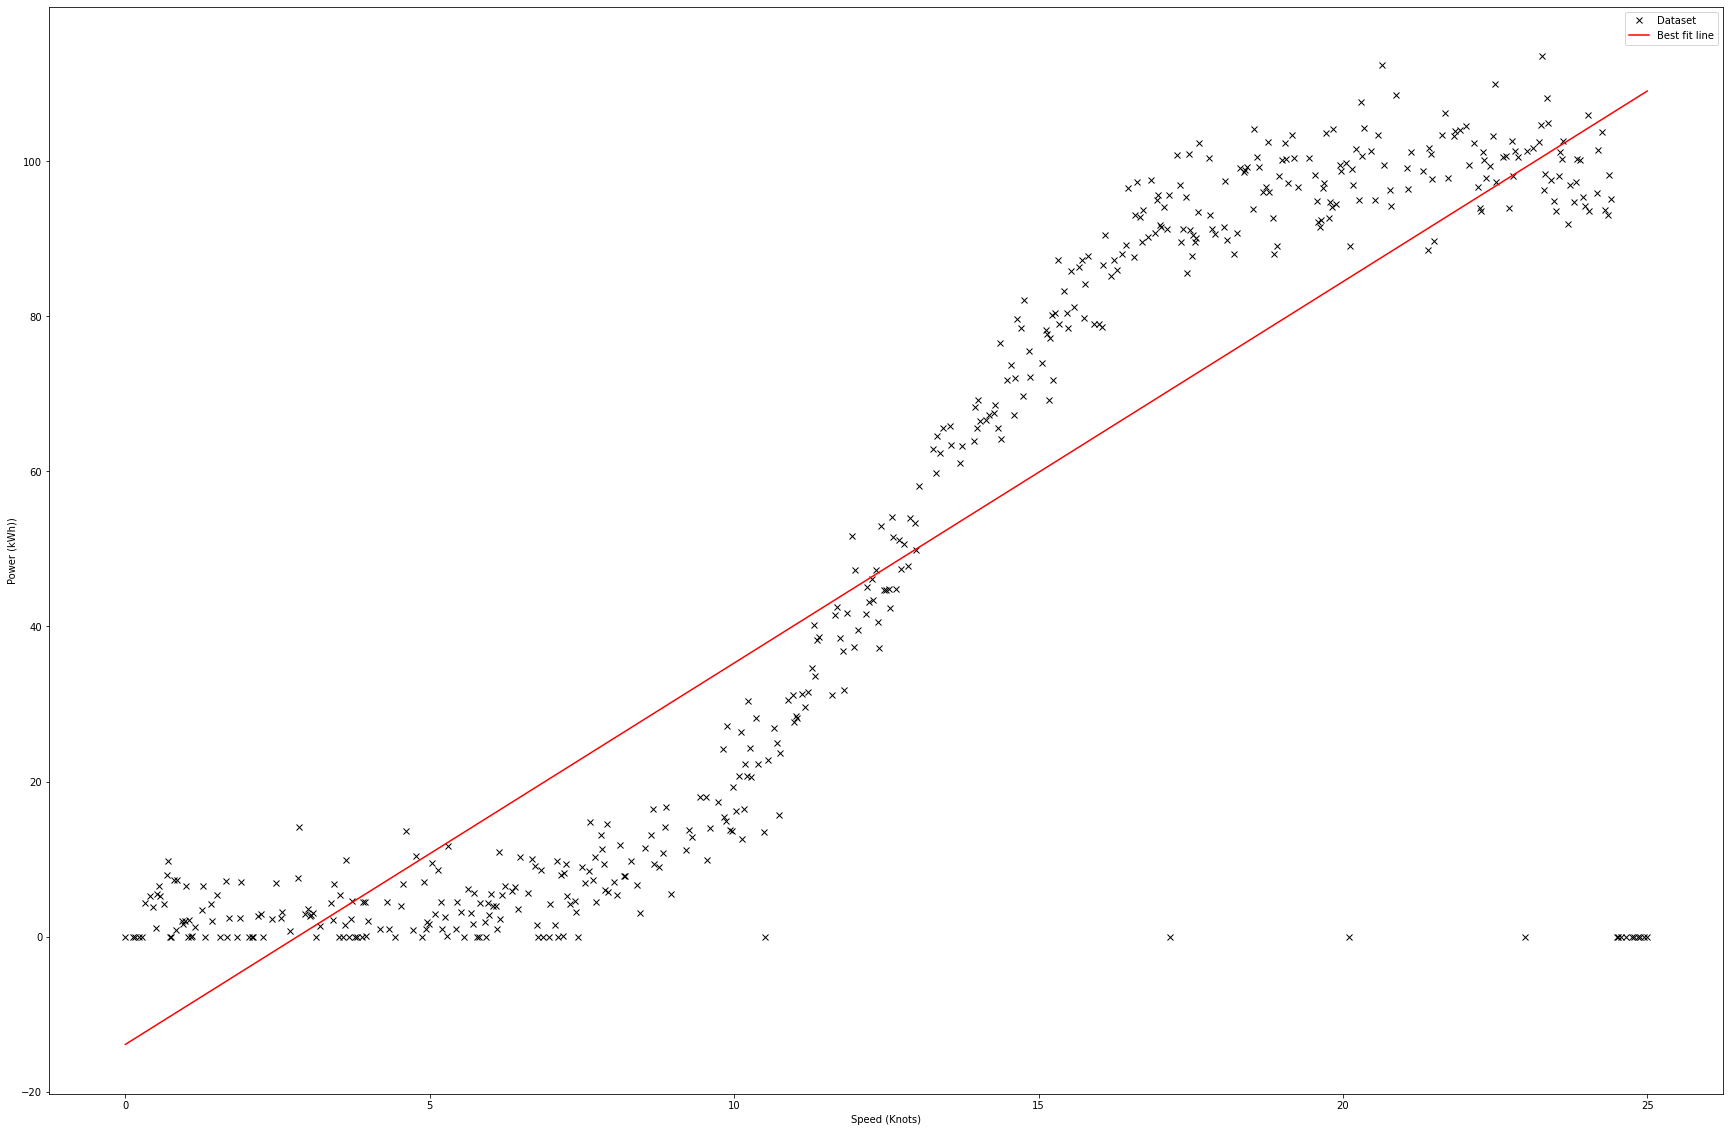

In [9]:
# Plotting the Dataset and applying the best fit line.

# Plot the dataset as previous done above
plt.plot(x, y, 'kx', label = 'Dataset')

# add the values from the np.polyfit code in the previous cell.
# calling the code 'coeffs' allows us to break the array into parts with [] brackets.
plt.plot(x, coeffs[0] * x + coeffs[1], 'r-', label='Best fit line')

# label x & y axis, and the legend
plt.xlabel('Speed (Knots)')
plt.ylabel('Power (kWh))')
plt.legend()

plt.show()

### Analysis of Linear Regression on this Dataset

**Best Fit Line**

Looking at the dataset, you can see that generally the more wind speed the more power that is generated. Theory will show that makes and simple linear regression should in theory work. 
On first look, you wouldn't be far away from saying that it does not work and is a bad fit. It cuts throught the dataset on three occasions: early in the dataset, centrally and towards the upper right corner. The direction of the line is heading in the correct direction and earlier proof does show that there is a relationship between both variables. What does make it look not a good fit would be the start of the dataset, which does cluster around speeds 0-7 knots. This is likely due to the fact that wind turbines need a certain wind in order for them to become functional. As they are such big structures, this would make sense.

Analysing the central area of the plot seems to be the most consistent. From 10 knots up to 18 knots, the rate of change in power visually looks to be increasing at a steady state. More of an increase than that of the best-fit line which takes in the dataset as a whole. Again there does appear to be 1 outlier in that section of data but no dataset is perfect and unexpected events and situations will almost show its face.

The upper corner of the dataset shows that between speeds of 18 to 24 knots, that the power does not continue to rise past a max of 113 kwh. Without knowing the finer details of the wind turbines, can we expect that this is the total power generated per wind turbine when it reachs speeds of 18 knots and more? It is obviously not conclusive to assume that and more data and perhaps some operational facts and structural details would need to be required to further enhance that assumption but I expact that to be the case. 

**Outliers**

Looking at the dataset on the plot, you can see some unexpected results, known as outliers. On this dataset, they can be seen as the wind speed increases the power remains zero. This does bring up some questions as to what happened? Without knowing the full facts as to why the power remains at zero even though the wind speed increases, we can only guess. But logically thinking, as the speed rises, more power should be generated. If everything was so simple. 

Possible rationale to zero power generated may be:
 - Possible maintenance of the wind turbine, require maintenace 2/3 times annually [https://www.nexteraenergyresources.com/what-we-do/wind/faqs.html]
 - The Wind may be too strong [Pt.3, https://www.luvside.de/en/wind-turbine-not-turning/]
 - The wind may not be strong enough [Pt.2, https://www.luvside.de/en/wind-turbine-not-turning/]
 - Operational issue with the function of the wind turbine or the system registering the data over 20 knots.

### **Conclusion of the Best fit line**

**Positives**
The general direction of the dataset would be consistent to what logic would thing in that the more speed generated by the wind will in turn lead to a higher output of power. You cannot deny that is is the case. With the complexity of the dataset as a result of the general item being measured, it would obviously not so straightforward. The shape of the dataset , almost shaped would appear to be logical, perhaps the later stages in the dataset, from 18 knots to 24 knots and most definitely the power output at 25 knots which returns to zero. To me this does not reflect true to the actually output thatwould be generated at 25knots and greater. To me, you could defintely use this linear regression on this dataset but I would highlight with caution if doing so. I will also point out that the bbets fit line crosses the dataset on three occasions and really this would be a strong indicator as to weather this regression can be used. I feel it most certainly can but I would also like to see further data, particularly showing more speed and to decide at that point exactly does this regression fit.

**Limitations**
No model is ever a perfect fit and more often that not, compressing data into a linear function loses the complex nature of a dataset. In the case above, it is clear that some complexity would be lost on the dataset, there are parts that would be very straightforward but as a whole there will be portions of the dataset that will be left out.

Going beyond historical data is certainly an area where most try to take advantage. In our case above, you can make a fair assumption if you were to guess the output of power at a certain speed, a linear regression will give you an answer. Will it be right? Potentially yes and no. Particularly in the case above when dealing with nature and try to predict the speed of the wind that will lead to x amount of power generated, you can see the complexity of the dataset already. Forecaseters can predict the weather, but how often are the wrong. Dealing with nature and a naturally generated resource that unfortunately cannot be clearly measured in supply, it does have some issues in predicting future outcomes. The next piece of code shows three values of speed and the output of power it brings with it. Again, in a simple linear regression model this could be more accurate

**Final Findings**
I would be not against using simple linear regression to predict future outputs of power. Logically, the more speed should generate more power. There clearly was scenarios where is was not the case, particularly towards the end of the dataset. 









### Predicting Values

In [10]:
# using the stats.lingress function in the scipy library 
# It allows me to select a value on the x-axis and it will output the value on the y-axis where the best-fit line meets.
# meaning predicting a value

slope, intercept, r, p, std_err = stats.linregress(x, y)

# define the function and the output
def futvalu(x):
  return slope * x + intercept

# input values to be predicted
speed1 = futvalu(10)
speed2 = futvalu(15)
speed3 = futvalu(30)

# output is where the x-axis meets the y-axis 
print(speed1)
print(speed2)
print(speed3)

# https://www.w3schools.com/python/python_ml_linear_regression.asp
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

35.276054023527074
59.86403235055042
133.62796733162043


## Additional regressions to view the Dataset.
***

An additional view of the dataset would be to look at it with a non-linear regression.
In the below example a Polynominal Regression is Applied.

Polynominal regression was chosen to view the shape of the data points. You could not say that the linear regression did not suit, but perhaps it would be more accurate to say its not ideal and maybe this may just be a better fit. We will see.

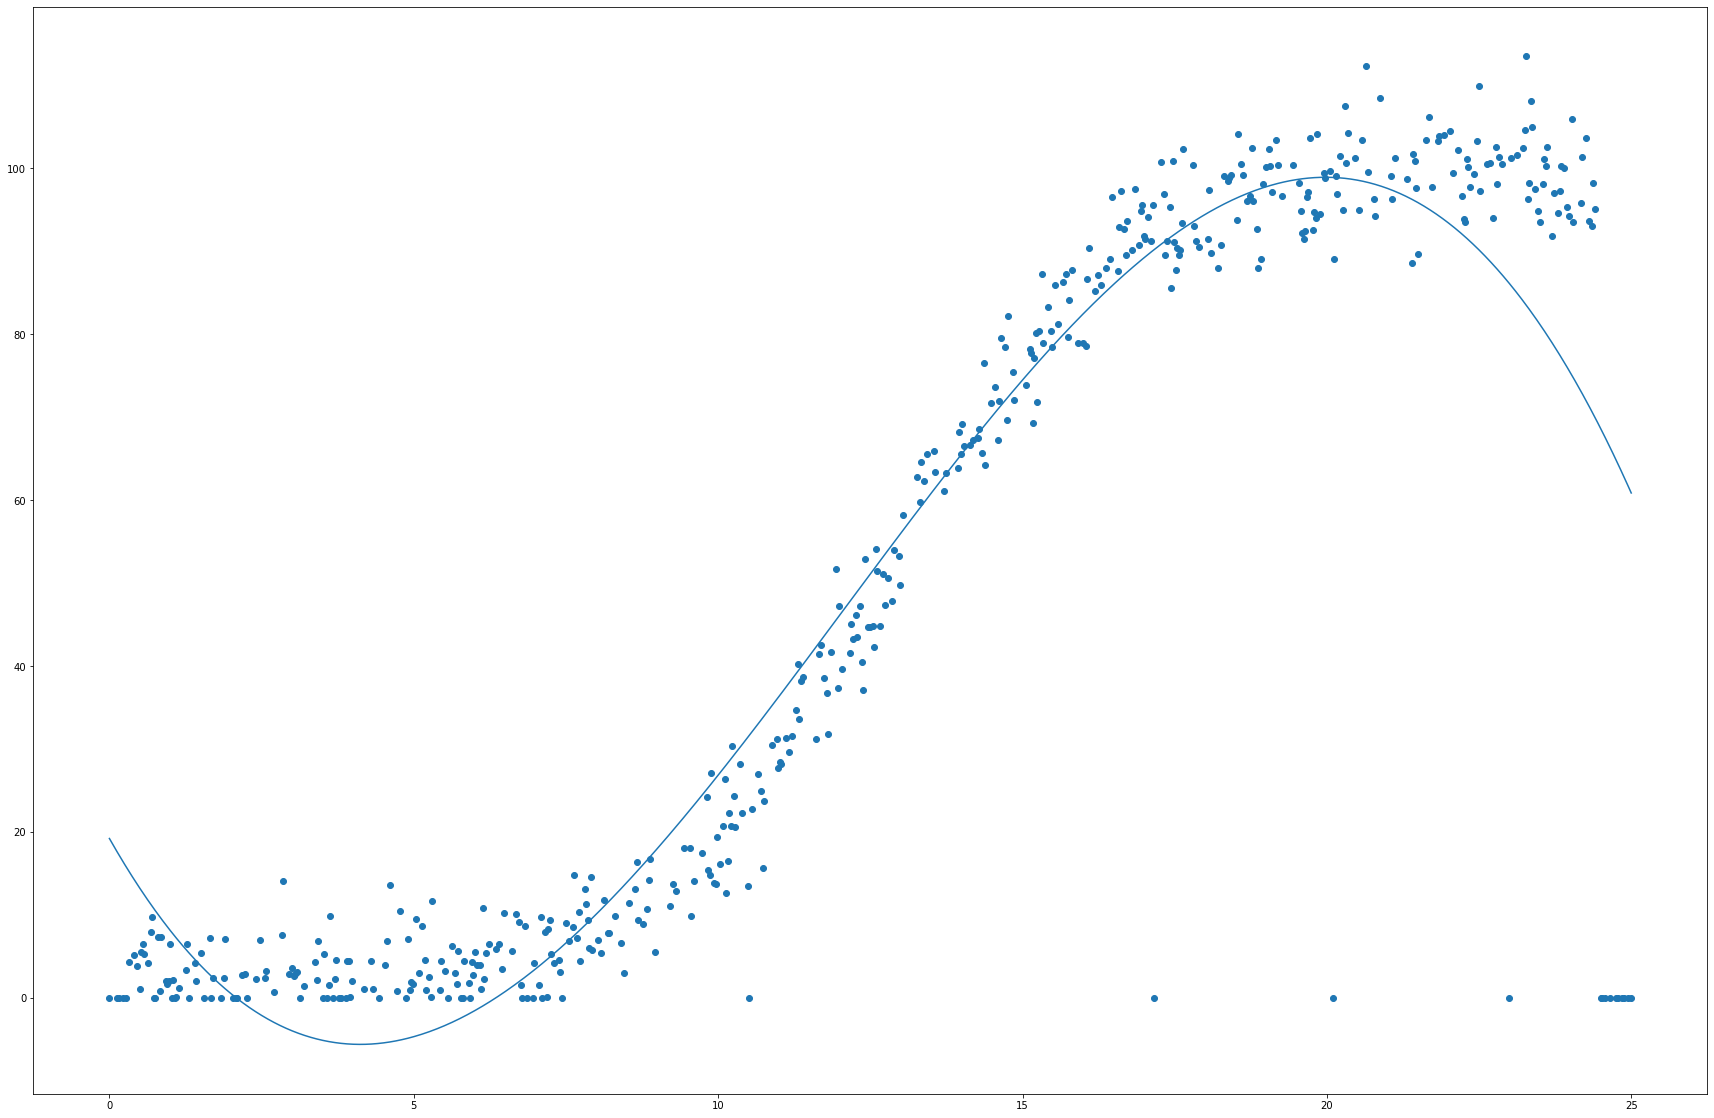

In [11]:
# Using the np.poly1d function and the np.polyfit function
# define the code
windy = np.poly1d(np.polyfit(x, y, 3))

# define the line
line = np.linspace(0, 25, 1000)

# plot the dataset & regression line
plt.scatter(x, y)
plt.plot(line, windy(line))
plt.show()

### Relationship

The below code shows the accuracy of the model and as you can see, it is close to 1 which identifies that this linear regression is quite accurate. This would be somewhat similar to the above simple linear regression model value that was generated also. 

In [12]:
from sklearn.metrics import r2_score

windy = np.poly1d(np.polyfit(x, y, 3))

print(r2_score(y, windy(x)))

0.8796883953739737


### Prediction

The below code allows us now to get a more accurate value of output for the dataset compared to the linear regression above.

My concern would be that predicting future values is where the issue occurs and most probably down to the values at 25 knots.

As you can see from the below predictions, the values at 12 & 18 are pretty much on point, but at 25 knots the value is now at 60. This does appear to be incorrect but yet it would be difficult to confirm that is the case without actually knowledge why this is the case and further data at higher speeds.

One thing is for sure at quite a lot of points through this new regression, outputs are far more accurate than the simple linear regression above. 

In [13]:
windy = np.poly1d(np.polyfit(x, y, 3))

speed1 = windy(12)
speed2 = windy(18)
speed3 = windy(25)

print(speed1)
print(speed2)
print(speed3)

46.1659864763262
94.4545145568469
60.86473294446488


References
***

 - https://www.metoffice.gov.uk/weather/guides/observations/how-we-measure-wind#:~:text=The%20instruments%20used%20to%20measure,%2D1%20%3D%201.15%20mph)

 - https://www.ammonit.com/en/wind/wind-energy#:~:text=What%20is%20the%20Measuring%20Unit,per%20year%20and%20per%20hour.

 - https://data36.com/linear-regression-in-python-numpy-polyfit/

 - https://www.w3schools.com/python/python_ml_polynomial_regression.asp

 - https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html
 - https://realpython.com/linear-regression-in-python/
 - https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4
 - https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html
 - https://towardsdatascience.com/machine-learning-with-python-easy-and-robust-method-to-fit-nonlinear-data-19e8a1ddbd49
 - https://www.geeksforgeeks.org/non-linear-regression-examples-ml/
 - https://towardsdatascience.com/polynomial-regression-bbe8b9d97491
 - https://data36.com/linear-regression-in-python-numpy-polyfit/
 - https://www.nexteraenergyresources.com/what-we-do/wind/faqs.html
 - https://realpython.com/pandas-plot-python/
 - https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html